# The first objective is to take this sample image, and break it down into readable and consistent sizes that center the object of interest. 

In [1]:

%matplotlib inline


import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import glob
from sklearn.preprocessing import normalize
from cv2 import COLOR_GRAY2RGB
from imutils import contours
from skimage import measure
import numpy as np
import imutils


In [2]:
imagefile = '../data/lsst.jpg'

Using image masking based on code @ https://www.pyimagesearch.com/2016/10/31/detecting-multiple-bright-spots-in-an-image-with-python-and-opencv/

In [9]:
# load the image, convert it to grayscale, and blur it
image = cv2.imread(imagefile)
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (21, 21), 0)


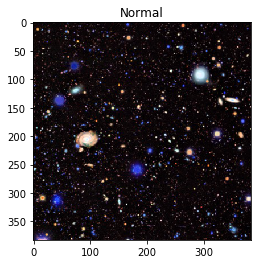

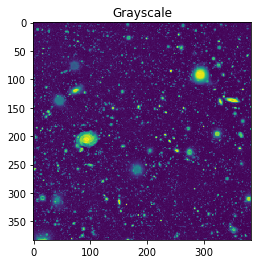

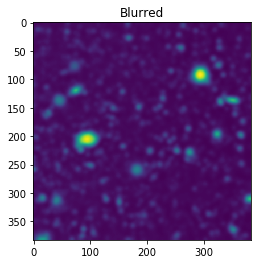

In [10]:
plt.title("Normal")
plt.imshow(image)
plt.figure()
plt.title("Grayscale")
plt.imshow(gray)
plt.figure()
plt.title("Blurred")
plt.imshow(blurred)

The importance of this blur is it gives a sort of uniformity to the objects of interest, making it easier to identify as belonging to the same part of the image. This is even more apparent when using a threshold as seen below.

In [11]:
# threshold the image to reveal light regions in the
# blurred image
thresh = cv2.threshold(blurred, 100, 255, cv2.THRESH_BINARY)[1]

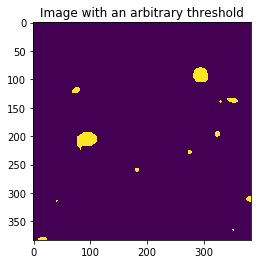

In [12]:
plt.title("Image with an arbitrary threshold")
plt.imshow(thresh)

In [13]:
#These labels correspond to the different regions. 
labels = measure.label(thresh, neighbors=8, background=0)
mask = np.zeros(thresh.shape, dtype="uint8")

In this block of code I loop over each of these bright spots, creating a new array for each allowing me to run (ideally) a CNN for one object at a time and determine what it is. 

0
1
2
3
4
5
6
7
8
9
10
11
12


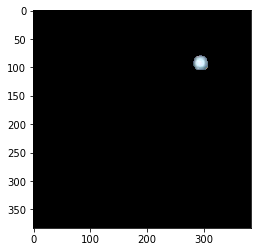

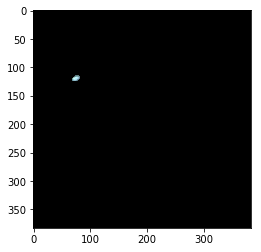

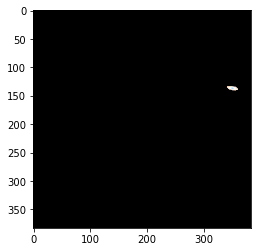

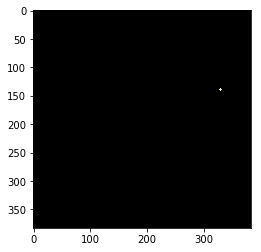

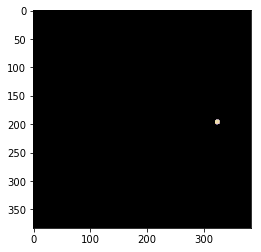

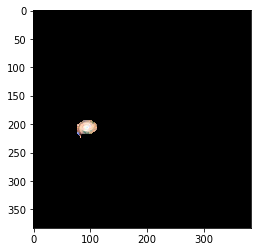

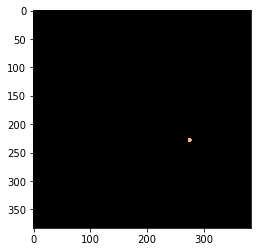

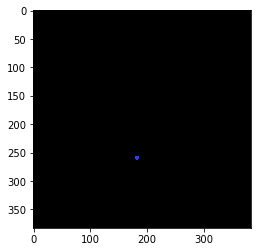

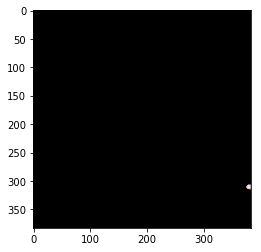

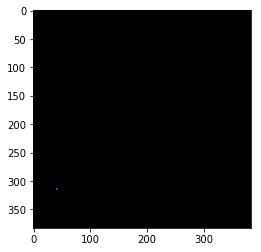

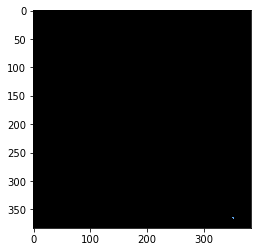

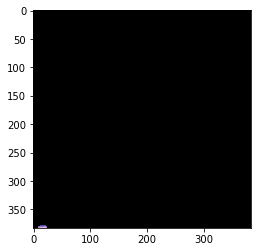

In [14]:
# loop over the unique components
image_identiciation_dataset = [] #array for prediction with a CNN. 
for label in np.unique(labels):  
    image = cv2.imread(imagefile)  #read in the image
    print(label)
# if this is the background label, ignore it
    if label == 0:
        continue
 
    # otherwise, construct the label mask and count the
    # number of pixels 
    labelMask = np.zeros(thresh.shape, dtype="uint8")
    labelMask[labels == label] = 255  #immediately make it as large as possible
   # plt.figure()
    for i in range(len(labelMask)):
        for j in range(len(labelMask[i])):  #create a mask on the array, revealing only the important object at that time. 
            if labelMask[i][j] == 0:  
                labelMask[i][j] = False
            else:
                labelMask[i][j] = True
    for color in range(np.shape(image)[2]):
    #print(image[:,:,color]) #this is one particular color 
        image[:,:,color] = np.multiply(labelMask,image[:,:,color])  #apply masking to each RGB filter
    image_identiciation_dataset.append(image)  #append the rgb image to the array
    plt.figure()
    plt.imshow(image)
    plt.savefig('../plots/' +str(label)+'.png')
    #plt.savefig  #plot the new object as proof of concept.
    